<a href="https://colab.research.google.com/github/SarthakV7/AI-based-indian-license-plate-detection/blob/master/case_study_2_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# reading the data into dataframe using pandas
train = pd.read_csv('drive/My Drive/case_study_2/train.csv')
test = pd.read_csv('drive/My Drive/case_study_2/test.csv')
submission = pd.read_csv('drive/My Drive/case_study_2/sample_submission.csv')

## About the data:
- The train data contains 6079 listings and each listing has 41 columns. Out of these 41 columns, ‘question_title’, ‘question_body’ and ‘answer’ are to be used as the input, and for output we have 30 target labels.
- The input features are all text features that contain the title of the question, description of the question and the answer to that question.
- The output features are all of float type, some are binary features that take a value of either 0 or 1 and some take a value between 0 and 1.

In [3]:
# Let's check the top 5 entries of train data.
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.000000,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,0.000000,0.666667,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.333333,0.333333,0.0,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com,0.888889,0.666667,0.666667,1.0,1.0,1.0,0.444444,0.444444,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [4]:
# Let's list the features provided in the train data
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [5]:
# Let's check the statistical description of the numerical features in train data
train.describe()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,4829.665899,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,0.429978,0.284915,0.038137,0.010035,0.030762,0.065225,0.497587,0.166063,0.386385,0.000823,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,2789.689555,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,0.365952,0.368826,0.153635,0.074240,0.138065,0.197582,0.423138,0.257301,0.383384,0.020489,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,2389.000000,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,4847.000000,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,7222.000000,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667,0.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,9647.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# These are the features provided in the test data
test.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')

In [7]:
test.describe()

,qa_id
count,476.000000
mean,5029.186975
std,2812.670060
min,39.000000
25%,2572.000000
50%,5093.000000
75%,7482.000000
max,9640.000000


In [8]:
# these are the features that we need to include while submitting the results
submission.columns

Index(['qa_id', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written'],
      dtype='object')

## EDA

#### Question IDs

In [9]:
# Statistical description of question_id feature (this feature is irrelevant, will be used only for mapping the results)
train['qa_id'].describe()

count    6079.000000
mean     4829.665899
std      2789.689555
min         0.000000
25%      2389.000000
50%      4847.000000
75%      7222.000000
max      9647.000000
Name: qa_id, dtype: float64

In [10]:
test['qa_id'].describe()

count     476.000000
mean     5029.186975
std      2812.670060
min        39.000000
25%      2572.000000
50%      5093.000000
75%      7482.000000
max      9640.000000
Name: qa_id, dtype: float64

#### Question title

In [11]:
# A text feature that represents the title of the question.
train['question_title'].head()

0    What am I losing when using extension tubes in...
1    What is the distinction between a city and a s...
2    Maximum protusion length for through-hole comp...
3                Can an affidavit be used in Beit Din?
4         How do you make a binary image in Photoshop?
Name: question_title, dtype: object

In [0]:
# Let's check the length of each question titles
length = train['question_title'].apply(lambda x:len(x))

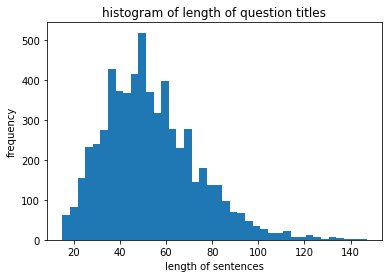

In [13]:
# histogram of length of question titles
plt.hist(length, bins=40)
plt.title('histogram of length of question titles')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [14]:
# statistical description of length of question titles
pd.Series(length).describe()

count    6079.000000
mean       53.310248
std        20.205065
min        15.000000
25%        39.000000
50%        50.000000
75%        65.000000
max       147.000000
Name: question_title, dtype: float64

In [0]:
# Test data

In [16]:
test['question_title'].head()

0    Will leaving corpses lying around upset my pri...
1           Url link to feature image in the portfolio
2    Is accuracy, recoil or bullet spread affected ...
3       Suddenly got an I/O error from my external HDD
4    Passenger Name - Flight Booking Passenger only...
Name: question_title, dtype: object

In [0]:
length = test['question_title'].apply(lambda x:len(x))

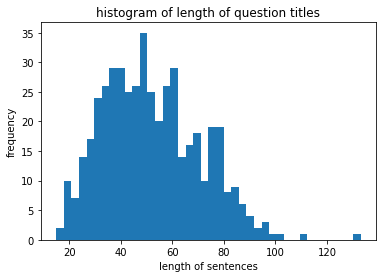

In [18]:
# histogram of length of question titles
plt.hist(length, bins=40)
plt.title('histogram of length of question titles')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [19]:
# statistical description of length of question titles
pd.Series(length).describe()

count    476.000000
mean      52.027311
std       18.754965
min       15.000000
25%       37.750000
50%       50.000000
75%       64.250000
max      133.000000
Name: question_title, dtype: float64

#### Question body

In [20]:
# this is another and the main text feature that represents the full description of the question asked
train['question_body'].head()

0    After playing around with macro photography on...
1    I am trying to understand what kinds of places...
2    I'm working on a PCB that has through-hole com...
3    An affidavit, from what i understand, is basic...
4    I am trying to make a binary image. I want mor...
Name: question_body, dtype: object

In [0]:
# Lets check the length of the questions body
length = train['question_body'].apply(lambda x:len(x))

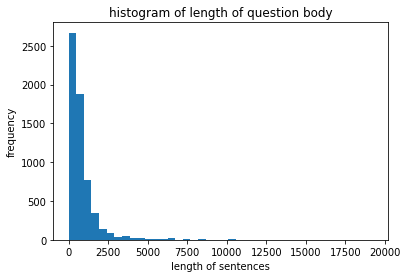

In [22]:
# let's plot the histogram of length of question body
plt.hist(length, bins=40)
plt.title('histogram of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [23]:
# Statistical description of questions body length
pd.Series(length).describe()

count     6079.000000
mean       833.760487
std       1029.046986
min          1.000000
25%        323.000000
50%        544.000000
75%        969.500000
max      19253.000000
Name: question_body, dtype: float64

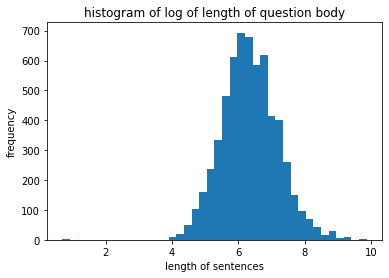

In [24]:
# Since the distribution of lengths is power-law, let's convert it to normal using log(1+x)
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [0]:
### Test data

In [26]:
test['question_body'].head()

0    I see questions/information online about how t...
1    I am new to Wordpress. i have issue with Featu...
2    To experiment I started a bot game, toggled in...
3    I have used my Raspberry Pi as a torrent-serve...
4    I have bought Delhi-London return flights for ...
Name: question_body, dtype: object

In [0]:
# length of question in test data
length = test['question_body'].apply(lambda x:len(x))

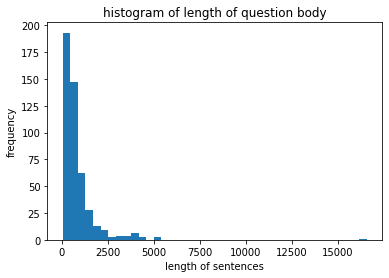

In [28]:
# histogram of length of question body
plt.hist(length, bins=40)
plt.title('histogram of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [29]:
# statisrical description of the lengths
pd.Series(length).describe()

count      476.000000
mean       844.462185
std       1110.742440
min         37.000000
25%        302.500000
50%        547.000000
75%        993.000000
max      16563.000000
Name: question_body, dtype: float64

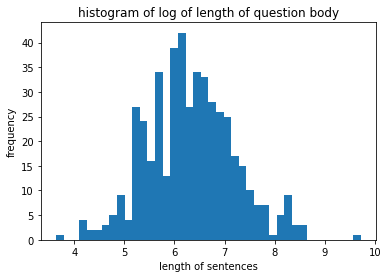

In [30]:
# Converting teh power-law distributed lengths to gaussian
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

#### Question user name, Question user page, Answer user name, Answer user page
#### (these are irrelevant features so I have not done EDA for them)

In [31]:
train['question_user_name'].head()

0             ysap
1    russellpierce
2        Joe Baker
3       Scimonster
4          leigero
Name: question_user_name, dtype: object

In [32]:
train['question_user_page'].head()

0           https://photo.stackexchange.com/users/1024
1             https://rpg.stackexchange.com/users/8774
2    https://electronics.stackexchange.com/users/10157
3         https://judaism.stackexchange.com/users/5151
4    https://graphicdesign.stackexchange.com/users/...
Name: question_user_page, dtype: object

In [33]:
train['answer_user_name'].head()

0           rfusca
1     Erik Schmidt
2      Dwayne Reid
3    Y     e     z
4             q2ra
Name: answer_user_name, dtype: object

In [34]:
train['answer_user_page'].head()

0           https://photo.stackexchange.com/users/1917
1             https://rpg.stackexchange.com/users/1871
2    https://electronics.stackexchange.com/users/64754
3         https://judaism.stackexchange.com/users/4794
4    https://graphicdesign.stackexchange.com/users/...
Name: answer_user_page, dtype: object

#### Answer

In [35]:
# Another important text type feature that represents the answers that given to the questions.
train['answer'].head()

0    I just got extension tubes, so here's the skin...
1    It might be helpful to look into the definitio...
2    Do you even need grooves?  We make several pro...
3    Sending an "affidavit" it is a dispute between...
4    Check out Image Trace in Adobe Illustrator. \n...
Name: answer, dtype: object

In [0]:
# Length of answers
length = train['answer'].apply(lambda x:len(x))

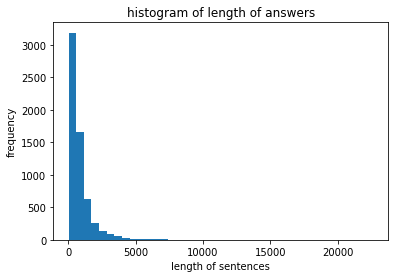

In [37]:
# histogram of length of answers
plt.hist(length, bins=40)
plt.title('histogram of length of answers')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [38]:
# statistical description of the length of answers
pd.Series(length).describe()

count     6079.000000
mean       839.396776
std       1017.388923
min         21.000000
25%        297.000000
50%        556.000000
75%       1015.500000
max      22636.000000
Name: answer, dtype: float64

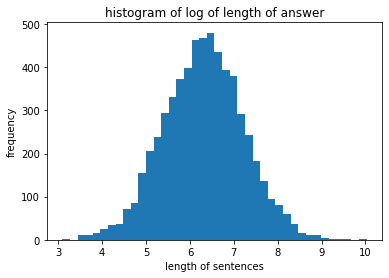

In [39]:
# histogram of log of length of answers to get them to normal distribution
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of answer')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [0]:
### Test data

In [41]:
test['answer'].head()

0    There is no consequence for leaving corpses an...
1    I think it is possible with custom fields.\n\n...
2    You do not have armour in the screenshots. Thi...
3    Your Western Digital hard drive is disappearin...
4    I called two persons who work for Saudia (tick...
Name: answer, dtype: object

In [0]:
length = test['answer'].apply(lambda x:len(x))

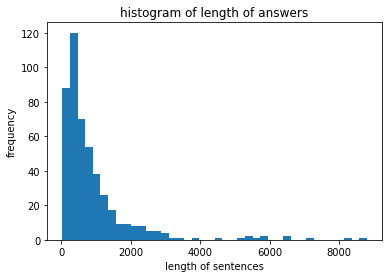

In [43]:
plt.hist(length, bins=40)
plt.title('histogram of length of answers')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [44]:
pd.Series(length).describe()

count     476.000000
mean      901.350840
std      1099.588287
min        36.000000
25%       311.000000
50%       566.000000
75%      1066.500000
max      8797.000000
Name: answer, dtype: float64

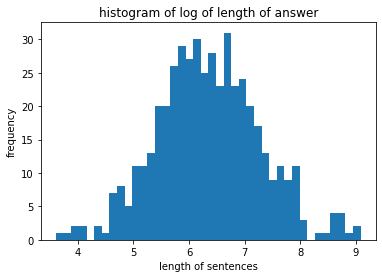

In [45]:
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of answer')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

#### URL

In [0]:
# this feature holds the webpage url's of the questions and answers

In [47]:
train['url'].head()

0    http://photo.stackexchange.com/questions/9169/...
1    http://rpg.stackexchange.com/questions/47820/w...
2    http://electronics.stackexchange.com/questions...
3    http://judaism.stackexchange.com/questions/551...
4    http://graphicdesign.stackexchange.com/questio...
Name: url, dtype: object

In [48]:
train['url'].value_counts()

http://stats.stackexchange.com/questions/125/what-is-the-best-introductory-bayesian-statistics-textbook                  12
http://programmers.stackexchange.com/questions/136987/what-does-mathematics-have-to-do-with-programming                  11
http://programmers.stackexchange.com/questions/31567/important-non-technical-course-for-programmers                      11
http://gamedev.stackexchange.com/questions/55558/how-to-prevent-the-too-awesome-to-use-syndrome                           9
http://programmers.stackexchange.com/questions/101528/how-do-i-deal-with-a-slow-and-undedicated-colleague-in-the-team     7
                                                                                                                         ..
http://stackoverflow.com/questions/16500163/how-to-upload-one-file-repository-to-gist-preserving-history                  1
http://cooking.stackexchange.com/questions/56779/what-is-the-white-sauce-of-dominos-pasta-made-of                         1
http://s

#### Category

In [49]:
# This feature represents the category that the question answer pair belong to.
train['category'].head()

0    LIFE_ARTS
1      CULTURE
2      SCIENCE
3      CULTURE
4    LIFE_ARTS
Name: category, dtype: object

In [50]:
train['category'].describe()

count           6079
unique             5
top       TECHNOLOGY
freq            2441
Name: category, dtype: object

In [51]:
# There are 5 categories
train['category'].value_counts()

TECHNOLOGY       2441
STACKOVERFLOW    1253
CULTURE           963
SCIENCE           713
LIFE_ARTS         709
Name: category, dtype: int64

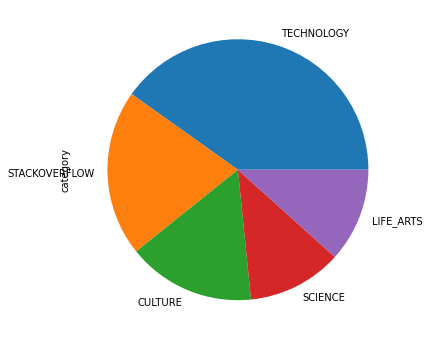

In [52]:
# this is the proportional distribution of the categories
train['category'].value_counts().plot(kind='pie', figsize=(6,6))
plt.show()

#### Host

In [53]:
# this feature represents the hostname/website of the question answer pairs
train['host'].head()

0            photo.stackexchange.com
1              rpg.stackexchange.com
2      electronics.stackexchange.com
3          judaism.stackexchange.com
4    graphicdesign.stackexchange.com
Name: host, dtype: object

In [54]:
# We can see that there are 63 type of these host names
train.host.value_counts()

stackoverflow.com                      1253
english.stackexchange.com               229
superuser.com                           227
electronics.stackexchange.com           221
serverfault.com                         213
                                       ... 
meta.christianity.stackexchange.com       4
meta.math.stackexchange.com               2
meta.askubuntu.com                        2
meta.codereview.stackexchange.com         2
robotics.stackexchange.com                2
Name: host, Length: 63, dtype: int64

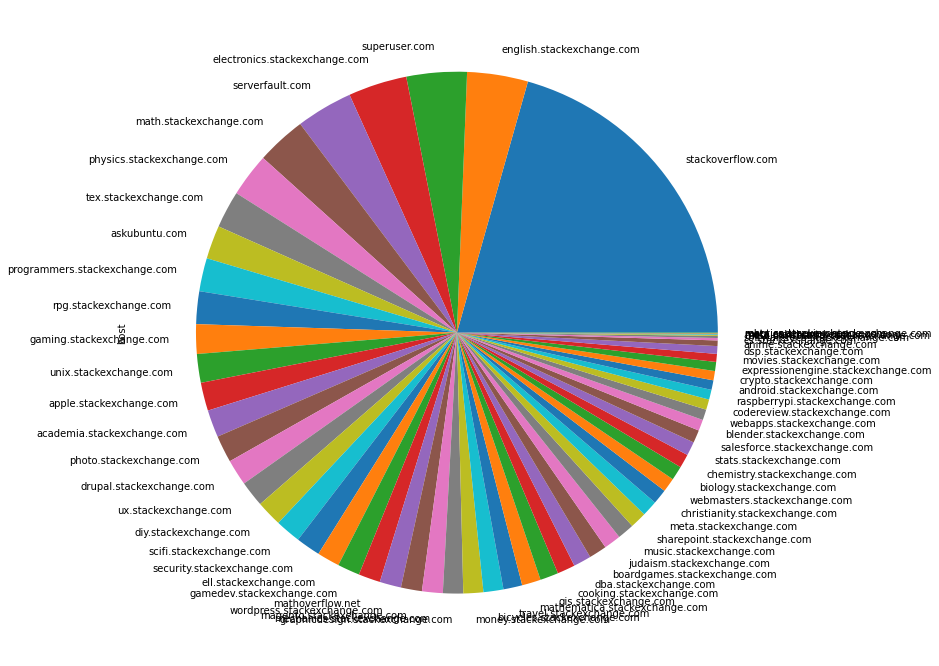

In [55]:
# pie chart representation of host proportions in train data
train.host.value_counts().plot(kind='pie', figsize=(12,12))
plt.show()

#### labels to be predicted

In [56]:
# there are 30 labels that we need to predict
train[train.columns[11:]].describe()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,0.429978,0.284915,0.038137,0.010035,0.030762,0.065225,0.497587,0.166063,0.386385,0.000823,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,0.365952,0.368826,0.153635,0.074240,0.138065,0.197582,0.423138,0.257301,0.383384,0.020489,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667,0.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


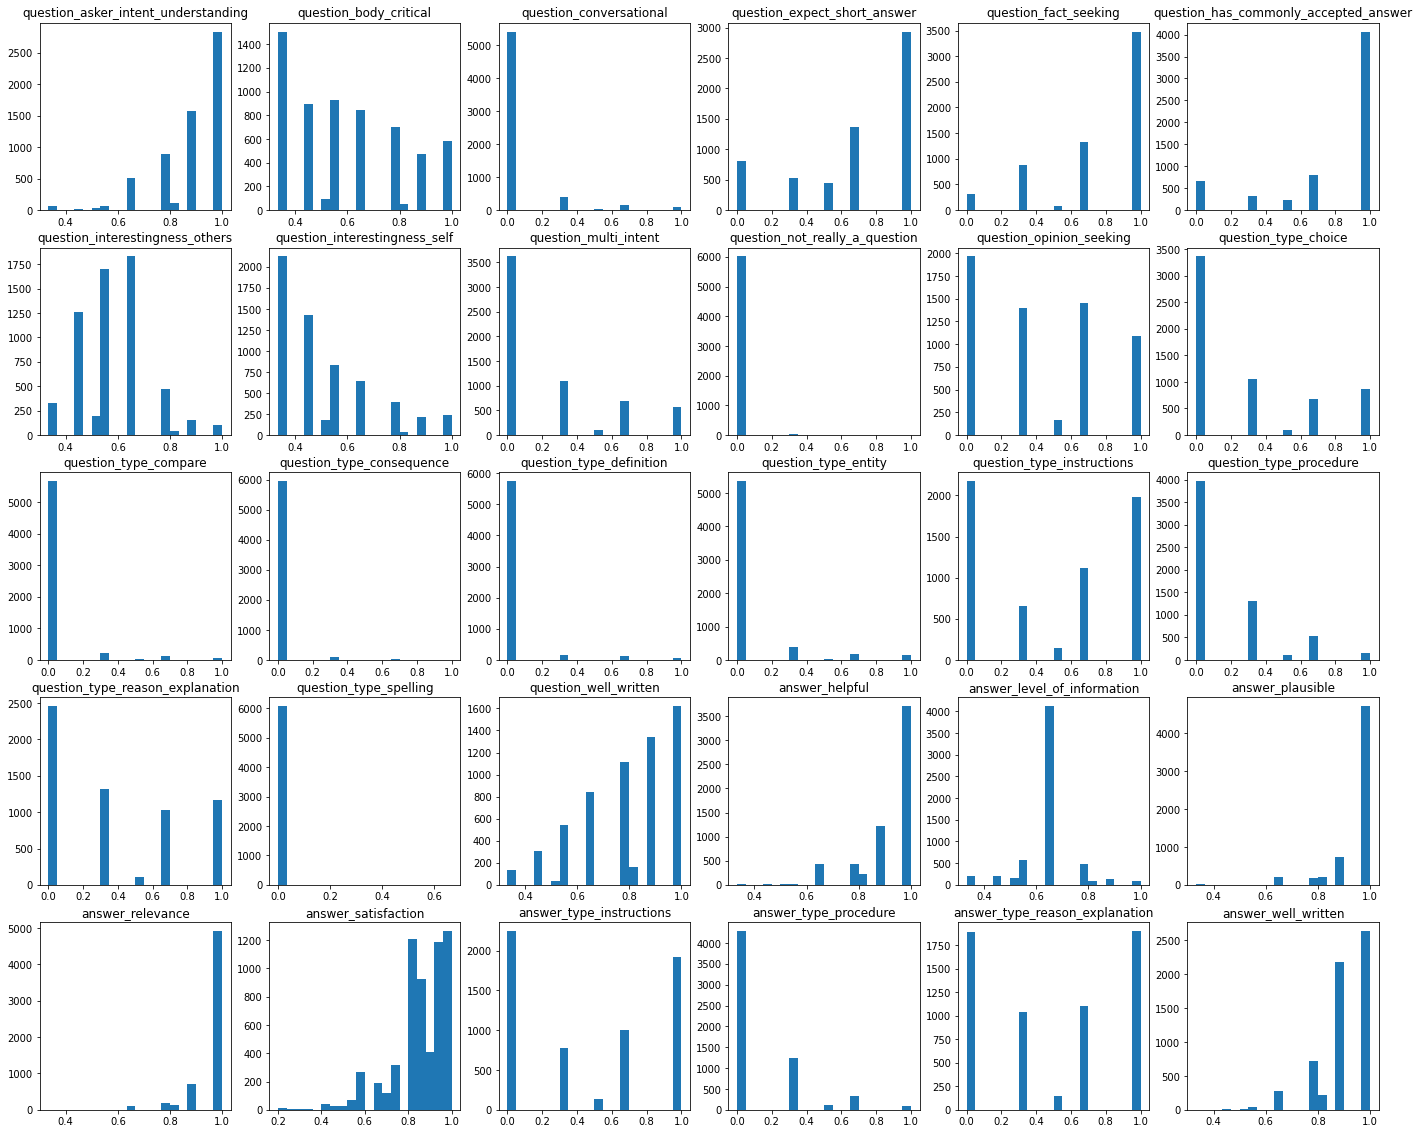

In [57]:
# histograms of the target labels
f,ax = plt.subplots(5,6, figsize=(24,20))
for i,label in enumerate(train.columns[11:]):
  plt.subplot(5,6,i+1)
  plt.hist(train[label], bins=20)
  plt.title(label)

plt.show()

In [58]:
train.shape

(6079, 41)

## Data preparation

#### Performing train test split.

In [59]:
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [0]:
y = train[train.columns[11:]]

In [0]:
from urllib.parse import urlparse
import re
from sklearn.preprocessing import OneHotEncoder

find = re.compile(r"^[^.]*")
train['clean_url'] = train['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])
test['clean_url'] = test['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])

In [0]:
X = train[['question_title', 'question_body', 'answer', 'clean_url', 'category']]

In [0]:
# train and cv split
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.001, random_state=42)

In [0]:
features = ['clean_url', 'category']

ohe = OneHotEncoder()
ohe.fit(X_train[features])
categorical_features_train = ohe.transform(X_train[features]).todense()
categorical_features_cv = ohe.transform(X_cv[features]).todense()

In [65]:
# Let's check the length of question title in last 10 percentiles
print('length of question title in last 10 percentiles')
x = pd.Series([len(x.split(' ')) for x in X_train['question_title']])
for i in range(90,100):
  print(f'{i}% --> {x.quantile(i/100)}')

length of question title in last 10 percentiles
90% --> 14.0
91% --> 14.0
92% --> 15.0
93% --> 15.0
94% --> 16.0
95% --> 16.0
96% --> 17.0
97% --> 17.0
98% --> 18.579999999999927
99% --> 20.0


In [0]:
# I'll be choosing the max_length_title as 20 since 99% points have a length less than 20 words
max_length_title = 14

In [67]:
# Let's check the length of question body in last 10 percentiles
print('length of question body in last 10 percentiles')
x = pd.Series([len(x.split(' ')) for x in X_train['question_body']])
for i in range(90,100):
  print(f'{i}% --> {x.quantile(i/100)}')

length of question body in last 10 percentiles
90% --> 283.0
91% --> 300.0
92% --> 318.0
93% --> 342.0
94% --> 372.0
95% --> 433.0
96% --> 499.0
97% --> 578.0
98% --> 722.0
99% --> 1028.539999999999


In [0]:
# I'll be choosing the max_length_body as 1000 since 99% points have a length less than 1000 words
max_length_body = 300

In [69]:
# Let's check the length of answer in last 10 percentiles
print('length of answer in last 10 percentiles')
x = pd.Series([len(x.split(' ')) for x in X_train['answer']])
for i in range(90,100):
  print(f'{i}% --> {x.quantile(i/100)}')

length of answer in last 10 percentiles
90% --> 294.0
91% --> 313.6100000000006
92% --> 341.0
93% --> 364.0
94% --> 393.0
95% --> 428.89999999999964
96% --> 490.3199999999997
97% --> 551.8699999999999
98% --> 621.5799999999999
99% --> 882.5799999999999


In [0]:
# I'll be choosing the max_length_body as 700 since 98% points have a length less than 700 words
max_length_answer = 300

In [71]:
# # Downloading GloVe data
!cp './drive/My Drive/glove.6B.zip' './'
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [72]:
from tqdm.notebook import tqdm
embeddings_index = dict()
f = open('glove.6B.300d.txt')
for line in tqdm(f):
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


#### Let's prepare question title first

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^`_{|}~\t\n', lower=True,
                      split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(X_train['question_title'].values)

In [0]:
train_title = tokenizer.texts_to_sequences(X_train['question_title'].values)
cv_title = tokenizer.texts_to_sequences(X_cv['question_title'].values)

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_title = pad_sequences(train_title, maxlen=max_length_title, padding='post', value=0)
cv_title = pad_sequences(cv_title, maxlen=max_length_title, padding='post', value=0)

In [76]:
title_vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_title = np.zeros((title_vocab_size, 300))
for word, i in tqdm(tokenizer.word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix_title[i] = embedding_vector

#### Let's prepare question body now

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^`_{|}~\t\n', lower=True,
                      split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(X_train['question_body'].values)

In [0]:
train_body = tokenizer.texts_to_sequences(X_train['question_body'].values)
cv_body = tokenizer.texts_to_sequences(X_cv['question_body'].values)

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_body = pad_sequences(train_body, maxlen=max_length_body, padding='post', value=0)
cv_body = pad_sequences(cv_body, maxlen=max_length_body, padding='post', value=0)

In [80]:
body_vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_body = np.zeros((body_vocab_size, 300))
for word, i in tqdm(tokenizer.word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix_body[i] = embedding_vector

#### Answers

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^`_{|}~\t\n', lower=True,
                      split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(X_train['answer'].values)

In [0]:
train_answer = tokenizer.texts_to_sequences(X_train['answer'].values)
cv_answer = tokenizer.texts_to_sequences(X_cv['answer'].values)

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_answer = pad_sequences(train_answer, maxlen=max_length_answer, padding='post', value=0)
cv_answer = pad_sequences(cv_answer, maxlen=max_length_answer, padding='post', value=0)

In [84]:
answer_vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_answer = np.zeros((answer_vocab_size, 300))
for word, i in tqdm(tokenizer.word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix_answer[i] = embedding_vector

In [0]:
# max_length_answer=300
# max_length_body=300
# max_length_title=14

#### Modeling

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, GRU, Input, Embedding, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.compat.v1.keras.layers import CuDNNGRU
# K.clear_session()

In [108]:
K.clear_session()

category_input = Input(64, name="category_input", dtype='float64')
dense_category = Dense(32, activation='relu')(category_input)

title_input = Input(max_length_title, name="title", dtype='float64')
title_embedding = Embedding(title_vocab_size, 300, weights=[embedding_matrix_title],
                            input_length=max_length_title, trainable=False)(title_input)
gru_layer_title = CuDNNGRU(units=8, return_sequences=True, return_state=False)(title_embedding)
avg_hidden_title = Flatten()(gru_layer_title)
print(avg_hidden_title.shape)
################################################
body_input = Input(max_length_body, name="body", dtype='float64')
body_embedding = Embedding(body_vocab_size, 300, weights=[embedding_matrix_body],
                            input_length=max_length_body, trainable=False)(body_input)
gru_layer_body = CuDNNGRU(units=16, return_sequences=True, return_state=False)(body_embedding)
avg_hidden_body = Flatten()(gru_layer_body)
print(avg_hidden_body.shape)
################################################
answer_input = Input(max_length_answer, name="answer", dtype='float64')
answer_embedding = Embedding(answer_vocab_size, 300, weights=[embedding_matrix_answer],
                            input_length=max_length_answer, trainable=False)(answer_input)
gru_layer_answer = CuDNNGRU(units=16, return_sequences=True, return_state=False)(answer_embedding)
avg_hidden_answer = Flatten()(gru_layer_answer)
print(avg_hidden_answer.shape)
################################################
# concat_layer = concatenate([dense_title, dense_body, dense_answer])
concat_layer = concatenate([avg_hidden_title, avg_hidden_body, avg_hidden_answer, dense_category])
dense_1 = Dense(128, activation='relu')(concat_layer)
# bn = BatchNormalization()(dense_1)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(30, activation='sigmoid')(dense_2)

model = Model(inputs=[title_input, body_input, answer_input, category_input], outputs=[dense_3])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(None, 112)
(None, 4800)
(None, 4800)


In [109]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 14)]         0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, 300)]        0                                            
__________________________________________________________________________________________________
answer (InputLayer)             [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 14, 300)      2211000     title[0][0]                      
______________________________________________________________________________________________

In [147]:
#### Model_2
K.clear_session()

category_input = Input(64, name="category_input", dtype='float64')
dense_category = Dense(32, activation='relu')(category_input)

title_input = Input(max_length_title, name="title", dtype='float64')
title_embedding = Embedding(title_vocab_size, 300, weights=[embedding_matrix_title],
                            input_length=max_length_title, trainable=False)(title_input)
title_embedding_flatten = Flatten()(title_embedding)
################################################
body_input = Input(max_length_body, name="body", dtype='float64')
body_embedding = Embedding(body_vocab_size, 300, weights=[embedding_matrix_body],
                            input_length=max_length_body, trainable=False)(body_input)
body_embedding_flatten = Flatten()(body_embedding)
################################################
answer_input = Input(max_length_answer, name="answer", dtype='float64')
answer_embedding = Embedding(answer_vocab_size, 300, weights=[embedding_matrix_answer],
                            input_length=max_length_answer, trainable=False)(answer_input)
answer_embedding_flatten = Flatten()(answer_embedding)

concat_layer = concatenate([title_embedding, body_embedding, answer_embedding], axis=1)

gru_layer = CuDNNGRU(units=16, return_sequences=True, return_state=False)(concat_layer)
avg_hidden = Flatten()(gru_layer)
print(avg_hidden.shape)
################################################
concat_layer_2 = concatenate([avg_hidden, dense_category])
dense_1 = Dense(128, activation='relu')(concat_layer_2)
# bn = BatchNormalization()(dense_1)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(30, activation='sigmoid')(dense_2)

model = Model(inputs=[title_input, body_input, answer_input, category_input], outputs=[dense_3])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(None, 9824)


In [148]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 14)]         0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, 300)]        0                                            
__________________________________________________________________________________________________
answer (InputLayer)             [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 14, 300)      2211000     title[0][0]                      
______________________________________________________________________________________________

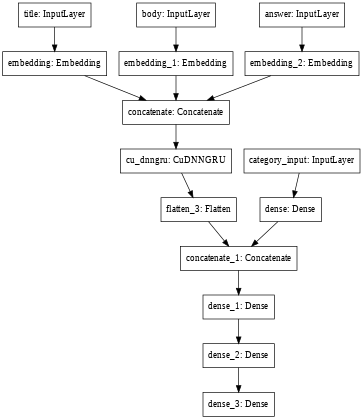

In [149]:
tf.keras.utils.plot_model(
 model,
 to_file='model.png',
 show_shapes=False,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=False,
 dpi=48
)

In [0]:
# categorical_features_train.shape
# tf.convert_to_tensor(categorical_features_train)

In [0]:
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
    rhos = []
    for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
        rhos.append(spearmanr(tcol, pcol).correlation)
    return np.nanmean(rhos)

In [0]:
def rhos(y, y_pred):
  return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)

In [0]:
metrics = [rhos]

In [0]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, mode='auto',
                                                 min_delta=0.0001, cooldown=0, min_lr=1e-7)

In [0]:
input_data = {'title': train_title, 'body': train_body, 'answer': train_answer, 'category_input': categorical_features_train}
cv_data = {'title': cv_title, 'body': cv_body, 'answer': cv_answer, 'category_input': categorical_features_cv}

In [156]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(input_data, y_train, epochs=100, batch_size=32, validation_split=0.4)

Epoch 1/100
  5/114 [>.............................] - ETA: 3s - loss: 0.7037 - rhos: -0.0148

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


114/114 [==============================] - 10s 89ms/step - loss: 0.6701 - rhos: 0.0204 - val_loss: 0.6352 - val_rhos: 0.0280
Epoch 2/100
114/114 [==============================] - 7s 57ms/step - loss: 0.5936 - rhos: 0.0406 - val_loss: 0.5559 - val_rhos: 0.0339
Epoch 3/100
114/114 [==============================] - 6s 57ms/step - loss: 0.5305 - rhos: 0.0448 - val_loss: 0.5087 - val_rhos: 0.0341
Epoch 4/100
114/114 [==============================] - 7s 57ms/step - loss: 0.4921 - rhos: 0.0562 - val_loss: 0.4757 - val_rhos: 0.0475
Epoch 5/100
114/114 [==============================] - 7s 57ms/step - loss: 0.4644 - rhos: 0.0738 - val_loss: 0.4552 - val_rhos: 0.0684
Epoch 6/100
114/114 [==============================] - 6s 57ms/step - loss: 0.4491 - rhos: 0.0886 - val_loss: 0.4447 - val_rhos: 0.0805
Epoch 7/100
114/114 [==============================] - 6s 56ms/step - loss: 0.4408 - rhos: 0.1044 - val_loss: 0.4386 - val_rhos: 0.0903
Epoch 8/100
114/114 [==============================] - 6s 5

In [0]:
y_train

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
1684,1.000000,0.444444,0.0,1.000000,1.000000,1.000000,0.444444,0.444444,0.333333,0.0,0.000000,0.666667,0.000000,0.0,0.0,0.000000,1.000000,0.333333,0.000000,0.0,0.888889,0.888889,0.500000,1.000000,1.000000,0.800000,0.666667,0.000000,0.000000,0.888889
5502,0.888889,0.333333,0.0,1.000000,0.666667,1.000000,0.666667,0.555556,0.000000,0.0,0.666667,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.666667,0.0,0.444444,0.888889,0.666667,1.000000,1.000000,0.900000,1.000000,0.000000,0.333333,0.888889
4623,0.888889,0.444444,0.0,0.333333,1.000000,0.333333,0.666667,0.444444,0.666667,0.0,0.666667,0.000000,0.666667,0.0,0.0,0.666667,0.666667,0.666667,0.666667,0.0,0.777778,0.666667,0.444444,0.777778,0.777778,0.533333,0.000000,0.333333,0.666667,0.777778
2057,0.777778,0.888889,0.0,0.666667,0.666667,0.333333,0.666667,0.555556,0.666667,0.0,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.666667,0.000000,0.666667,0.0,0.777778,1.000000,0.777778,1.000000,1.000000,0.933333,0.000000,0.000000,1.000000,1.000000
5619,0.888889,0.333333,0.0,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.333333,0.0,0.888889,0.888889,0.666667,0.888889,1.000000,0.900000,0.666667,0.000000,1.000000,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.666667,1.000000,0.0,1.000000,1.000000,0.500000,0.666667,0.333333,0.500000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.666667,0.666667,0.666667,0.666667,1.000000,0.800000,0.000000,0.000000,1.000000,0.666667
5191,1.000000,0.333333,0.0,1.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
5226,1.000000,0.444444,0.0,0.666667,0.666667,1.000000,0.555556,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.666667,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.000000,1.000000,0.888889
5390,1.000000,0.666667,0.0,1.000000,0.333333,1.000000,0.555556,0.444444,0.333333,0.0,0.666667,0.666667,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.666667,0.0,0.555556,0.888889,0.666667,1.000000,1.000000,0.900000,0.333333,0.000000,1.000000,0.888889


In [0]:
pred = model.predict(cv_data)

In [0]:
pred[0]

array([0.8073586 , 0.46990243, 0.04497376, 0.5424    , 0.8725765 ,
       0.77777237, 0.5034106 , 0.3112498 , 0.23657839, 0.01761348,
       0.28613213, 0.07448844, 0.04569268, 0.00948561, 0.03224302,
       0.03067231, 0.6121253 , 0.15309358, 0.6643828 , 0.00404263,
       0.84274936, 0.9153532 , 0.61445075, 0.9374236 , 0.94394   ,
       0.6780284 , 0.405354  , 0.06317393, 0.40225014, 0.85712636],
      dtype=float32)

In [0]:
y_cv.iloc[0]

question_asker_intent_understanding      0.777778
question_body_critical                   0.444444
question_conversational                  0.000000
question_expect_short_answer             0.500000
question_fact_seeking                    1.000000
question_has_commonly_accepted_answer    1.000000
question_interestingness_others          0.444444
question_interestingness_self            0.333333
question_multi_intent                    0.333333
question_not_really_a_question           0.000000
question_opinion_seeking                 0.333333
question_type_choice                     0.000000
question_type_compare                    0.000000
question_type_consequence                0.000000
question_type_definition                 0.000000
question_type_entity                     0.000000
question_type_instructions               0.666667
question_type_procedure                  0.666667
question_type_reason_explanation         0.666667
question_type_spelling                   0.000000
